In [1]:
import json
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import cv2
from Dataloader import PennFudanDataset
from torchvision.models import resnet50, ResNet50_Weights, vgg19
import torchvision

import torchvision.transforms as transforms
import os
import numpy as np
import torch
from PIL import Image
import json 
import cv2
import matplotlib.pyplot as plt
use_cuda = torch.cuda.is_available()
if use_cuda:
    device="cuda"
else:
    device="cpu"
import shutil
from tqdm import tqdm
# from engine import train_one_epoch, evaluate

In [14]:
backbone = torchvision.models.vgg19(weights="DEFAULT")

In [15]:
backbone

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [16]:
backbone.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [6]:

root_dir = "/home/sci/mkaranam/Desktop/ECE6960-Deep_Learn_Img_Analysis_project/bdd100k/labels/seg_track_20/rles/"

root_image_dir = "/home/sci/mkaranam/Desktop/ECE6960-Deep_Learn_Img_Analysis_project/bdd100k/images/seg_track_20/" 
type = "train"        
json_root_dir = root_dir + type + "/"
img_dir = root_image_dir + type +"/"

json_files = os.listdir(json_root_dir)
image_file = []
c = 0
all_frames = []
all_classes = []
removed_dir = "/home/sci/mkaranam/Desktop/ECE6960-Deep_Learn_Img_Analysis_project/zero_bound_box/"
removed_images = os.listdir(removed_dir)
for i in json_files:
    data = json.load(open(json_root_dir+i))
    for frame in data['frames']:
        single_frame = []
        single_class = []
        for j in frame['labels']:
            single_frame.append(j['box2d'])
            single_class.append(j['category'])
        if frame["name"] not in removed_images:
            all_frames.append(single_frame)
            all_classes.append(single_class)
            image_file.append(img_dir+frame['videoName']+"/"+frame["name"])
c = 0
neg = 0
empty_bounding_box = []
negative_bb = []
for i in range(len(all_frames)):
    if len(all_frames[i])==0:
        c+=1
        empty_bounding_box.append(image_file[i])
print(c)
for i in range(len(all_frames)):
    for each_frame in all_frames[i]:
        a = each_frame['x1']
        b = each_frame['y1']
        c = each_frame['x2']
        d = each_frame['y2']
        if a<0 or b <0 or c<0 or d<0:
            neg+=1
            negative_bb.append(image_file[i])
print(neg)
same = 0
same_bb = []
for i in range(len(all_frames)):
    for each_frame in all_frames[i]:
        a = each_frame['x1']
        b = each_frame['y1']
        c = each_frame['x2']
        d = each_frame['y2']
        if a==c or b==d:
            same+=1
            same_bb.append(image_file[i])
print(same)

# for i in empty_bounding_box:
#     try:
#         os.remove(i)
#     except OSError as e:
#         print("Error: %s : %s" % (i, e.strerror))

# for i in negative_bb:
#     try:
#         os.remove(i)
#     except OSError as e:
#         print("Error: %s : %s" % (i, e.strerror))


# print(neg)
# for i in empty_bounding_box:
#     shutil.move(i,"/home/sci/mkaranam/Desktop/ECE6960-Deep_Learn_Img_Analysis_project/val_zero_bounding_box")
# for i in negative_bb:
#     shutil.move(i,"/home/sci/mkaranam/Desktop/ECE6960-Deep_Learn_Img_Analysis_project/val_negative_bounding_box")
# for i in same_bb:
#     shutil.move(i,"/home/sci/mkaranam/Desktop/ECE6960-Deep_Learn_Img_Analysis_project/zero_bound_box")

0
0
0


In [17]:
class PennFudanDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, root_image_dir, type, removed_dir,transform = None, sample = 1):
        self.json_root_dir = root_dir + type + "/"
        self.img_dir = root_image_dir + type +"/"
        
        json_files = os.listdir(self.json_root_dir)
        image_file = []
 
        c = 0
        all_frames = []
        all_classes = []
        removed_images = os.listdir(removed_dir)
        for i in json_files:
            data = json.load(open(self.json_root_dir+i))
            for frame in data['frames']:
                single_frame = []
                single_class = []
                for j in frame['labels']:
                    single_frame.append(j['box2d'])
                    single_class.append(j['category'])
                if frame["name"] not in removed_images:
                    all_frames.append(single_frame)
                    all_classes.append(single_class)
                    image_file.append(self.img_dir+frame['videoName']+"/"+frame["name"])
        sample = int(len(image_file)*sample)
        self.image_files = image_file[:sample]
        self.bounding_box = all_frames[:sample]
        self.classes = all_classes[:sample]
        print(len(self.image_files))
        print(len(self.bounding_box))
        print(len(self.classes))
        self.transform = transform
        self.class_labels = {"pedestrian":1 , "rider":2 , "car":3 , "truck":4 , "bus":5, "train":6, "motorcycle":7, "bicycle":8, "traffic light":9, "traffic sign":10}
    def __getitem__(self, idx):
        # load images and masks
        img_path = os.path.join(self.image_files[idx])
        bound_box = self.bounding_box[idx]
        img = cv2.imread(img_path)
        boxes = []
        for i in bound_box:
            boxes.append([i['x1'], i['y1'], i['x2'], i['y2']])
        boxes = torch.FloatTensor(boxes)
        clases = self.classes[idx]
        final_classes = []
        for i in clases:
            final_classes.append(self.class_labels[i])
        # print(final_classes)
        # final_classes = torch.tensor(final_classes)
        image_id = torch.tensor([idx])
        final_classes = final_classes
        target = {}
        target["boxes"] = boxes
        # target["image_id"] = image_id
        target["labels"] = torch.LongTensor(final_classes)
        if self.transform:
            img = self.transform(img)
        target["boxes"] = torch.Tensor(target["boxes"])
        return img, target

    def __len__(self):
        return len(self.image_files)
    

In [18]:
def collate_fn(batch):
    if batch != 0:
        return tuple(zip(*batch))
train_dir = "/home/sci/mkaranam/Desktop/ECE6960-Deep_Learn_Img_Analysis_project/bdd100k/labels/seg_track_20/rles/"

img_dir = "/home/sci/mkaranam/Desktop/ECE6960-Deep_Learn_Img_Analysis_project/bdd100k/images/seg_track_20/" 
train_transforms = transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])
removed_dir = "/home/sci/mkaranam/Desktop/ECE6960-Deep_Learn_Img_Analysis_project/zero_bound_box/"
sample = 0.75
train = PennFudanDataset(train_dir, img_dir,"train", removed_dir,transform = train_transforms, sample = sample)

params = {'batch_size': 10,
    'shuffle': True}
train_dataloader = torch.utils.data.DataLoader(train,**params, collate_fn=collate_fn)
removed_dir = "/home/sci/mkaranam/Desktop/ECE6960-Deep_Learn_Img_Analysis_project/val_zero_bounding_box/"
val = PennFudanDataset(train_dir, img_dir,"val", removed_dir, transform = train_transforms)
val_dataloader = torch.utils.data.DataLoader(val, **params, collate_fn=collate_fn)

22439
22439
22439
6252
6252
6252


In [265]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
num_classes = 10 
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
model.cuda()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
# import torchvision
# from torchvision.models.detection import FasterRCNN
# from torchvision.models.detection.rpn import AnchorGenerator

# backbone = torchvision.models.mobilenet_v2(weights="DEFAULT").features
# backbone.out_channels = 1280

# anchor_generator = AnchorGenerator(sizes=((32, 64, 128, 256, 512),),
#                                    aspect_ratios=((0.5, 1.0, 2.0),))

# roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=['0'],
#                                                 output_size=7,
#                                                 sampling_ratio=2)

# model = FasterRCNN(backbone,
#                    num_classes=2,
#                    rpn_anchor_generator=anchor_generator,
#                    box_roi_pool=roi_pooler)

In [266]:
def validation(model, dataloader):
    model.eval()
    val_loss = []
    val_classifier_loss = []
    val_box_reg_loss = []
    for image, target in dataloader:
        images = list(image.to(device) for image in image)
        targets = [{k: v.to(device) for k, v in t.items()} for t in target]
        outputs = model(image, target)
        losses = sum(loss for loss in outputs.values())
        val_loss.append(losses.item())
        val_classifier_loss.append(outputs['loss_classifier'].item())
        val_box_reg_loss.append(outputs['loss_box_reg'].item())
    return np.mean(val_loss), np.mean(val_classifier_loss), np.mean(val_box_reg_loss)

In [272]:

params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.Adam(params, lr=0.001)
# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                                step_size=3,
                                                gamma=0.1)
epochs = 2
total_train_loss = []
total_classifier_loss = []
total_box_reg_loss = []
total_val_loss = []
total_val_classifier_loss = []
total_val_box_reg_loss = []
val_max_loss = np.inf
best_epoch = 0
if not os.path.exists(os.path.join("results")):
    os.makedirs(os.path.join("results"))
for epoch in tqdm(range(epochs)):
    model.train()
    train_loss = []
    classifier_loss = []
    box_reg_loss = []

    for image, target in train_dataloader:
        optimizer.zero_grad()
        images = list(image.to(device) for image in image)
        targets = [{k: v.to(device) for k, v in t.items()} for t in target]
        outputs = model(images, targets)
        losses = sum(loss for loss in outputs.values())
        losses.backward()
        optimizer.step()
        train_loss.append(losses.item())
        classifier_loss.append(outputs['loss_classifier'].item())
        box_reg_loss.append(outputs['loss_box_reg'].item())
    val_loss, val_classifier_loss, val_box_reg_loss = validation(model, val_dataloader)
    lr_scheduler.step()
    total_train_loss.append(np.mean(train_loss))
    total_classifier_loss.append(np.mean(classifier_loss))
    total_box_reg_loss.append(np.mean(box_reg_loss))
    total_val_loss.append(val_loss)
    total_val_classifier_loss.append(val_classifier_loss)
    total_val_box_reg_loss.append(val_box_reg_loss)

    if val_loss < val_max_loss:
        val_max_loss = val_loss	
        best_epoch = epoch
        print("Improvement-Detected")
        torch.save(model.state_dict(), os.path.join("results",'best_model.torch'))
    print("train loss {}, classifier loss {}, box reg loss {}".format(np.mean(train_loss),np.mean(classifier_loss),np.mean(box_reg_loss)))
    print("Training Done Best Epoch is at ", best_epoch)

  0%|          | 0/2 [02:12<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
z = os.listdir("/home/sci/mkaranam/Desktop/ECE6960-Deep_Learn_Img_Analysis_project/zero_bound_box/")
n = os.listdir("/home/sci/mkaranam/Desktop/ECE6960-Deep_Learn_Img_Analysis_project/negative_bound_box/")

In [ ]:
test = "0035afff-47378fa3-0000171.jpg"
test in n

True

In [ ]:
test in os.listdir("/home/sci/mkaranam/Desktop/ECE6960-Deep_Learn_Img_Analysis_project/bdd100k/images/seg_track_20/train/0035afff-47378fa3/")


False

In [1]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
    print("It should print Default GPU Device: /device:GPU:0")
else:
    print("Please install GPU version of TF")

2023-05-04 11:37:32.709862: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 11:37:35.572139: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-04 11:37:37.104370: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-04 11:37:54.459574: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

Please install GPU version of TF


2023-05-04 11:38:14.471395: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 11:38:14.557618: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-04 11:38:14.645239: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-05-04 11:38:14.645257: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you wou

In [2]:
len([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 4, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 4, 3,
        3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3])

60

In [4]:
import numpy as np

In [5]:
np.array([[862., 381., 998., 479.],
        [837., 359., 943., 450.],
        [817., 371., 852., 423.],
        [779., 373., 796., 387.],
        [747., 378., 768., 394.],
        [735., 369., 773., 380.],
        [678., 372., 716., 406.],
        [624., 375., 672., 400.],
        [556., 381., 595., 407.],
        [327., 383., 424., 442.],
        [221., 399., 341., 458.],
        [110., 388., 132., 452.]]).shape

(12, 4)

In [6]:
len([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1])

12

In [207]:
bbb = aa['boxes']
for i in range(len(bbb)):
    print(bbb[i])
    break

tensor([641.0510, 236.2770, 918.5641, 378.6702], device='cuda:0')


In [204]:
labels_class

['car', 'car']

In [166]:

class PennFudanDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, root_image_dir, type, removed_dir,transform = None, sample = 1):
        self.json_root_dir = root_dir + type + "/"
        self.img_dir = root_image_dir + type +"/"
        
        json_files = os.listdir(self.json_root_dir)
        image_file = []
        c = 0
        all_frames = []
        all_classes = []
        removed_images = os.listdir(removed_dir)
        for i in json_files:
            data = json.load(open(self.json_root_dir+i))
            for frame in data['frames']:
                single_frame = []
                single_class = []
                for j in frame['labels']:
                    single_frame.append(j['box2d'])
                    single_class.append(j['category'])
                if frame["name"] not in removed_images:
                    all_frames.append(single_frame)
                    all_classes.append(single_class)
                    image_file.append(self.img_dir+frame['videoName']+"/"+frame["name"])
        sample_percent = int(len(image_file)*sample)
        self.image_files = image_file[:sample_percent]
        self.bounding_box = all_frames[:sample_percent]
        self.classes = all_classes[:sample_percent]
        self.transform = transform
        self.class_labels = {"pedestrian":1 , "rider":2 , "car":3 , "truck":4 , "bus":5, "train":6, "motorcycle":7, "bicycle":8, "traffic light":9, "traffic sign":10}
    def __getitem__(self, idx):
        # load images and masks
        img_path = os.path.join(self.image_files[idx])
        bound_box = self.bounding_box[idx]
        img = Image.open(img_path).convert("RGB")
        boxes = []
        for i in bound_box:
            boxes.append([i['x1'], i['y1'], i['x2'], i['y2']])
        boxes = torch.FloatTensor(boxes)
        clases = self.classes[idx]
        final_classes = []
        for i in clases:
            final_classes.append(self.class_labels[i])
        # print(final_classes)
        # final_classes = torch.tensor(final_classes)
        image_id = torch.tensor([idx])
        final_classes = final_classes
        target = {}
        target["boxes"] = boxes
        # target["image_id"] = image_id
        target["labels"] = torch.LongTensor(final_classes)
        if self.transform:
            img = self.transform(img)
        target["boxes"] = torch.Tensor(target["boxes"])
        return img, target

    def __len__(self):
        return len(self.image_files)
    

train_dir = "/home/sci/mkaranam/Desktop/ECE6960-Deep_Learn_Img_Analysis_project/bdd100k/labels/seg_track_20/rles/"

img_dir = "/home/sci/mkaranam/Desktop/ECE6960-Deep_Learn_Img_Analysis_project/bdd100k/images/seg_track_20/" 
removed_dir = "/home/sci/mkaranam/Desktop/ECE6960-Deep_Learn_Img_Analysis_project/val_zero_bounding_box/"
train_transforms = transforms.Compose([
transforms.ToTensor()
    ])
val = PennFudanDataset(train_dir, img_dir,"val", removed_dir, transform = train_transforms)
val_dataloader = torch.utils.data.DataLoader(val, batch_size=1)#, shuffle=True, collate_fn=collate_fn


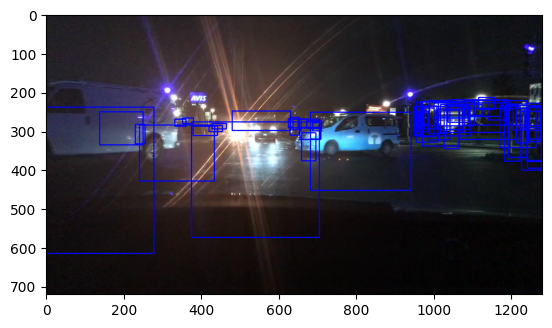

In [171]:
backbone = torchvision.models.mobilenet_v2(weights="DEFAULT").features
backbone.out_channels = 1280
anchor_generator = AnchorGenerator(sizes=((64, 128, 512),),
                                aspect_ratios=((0.5, 1.0, 2.0),))
roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=['0'],
                                                output_size=5,
                                                sampling_ratio=2)
model = FasterRCNN(backbone,
                num_classes=10,
                rpn_anchor_generator=anchor_generator,
                box_roi_pool=roi_pooler)
model.to(device)
model.load_state_dict(torch.load("/home/sci/mkaranam/Desktop/ECE6960-Deep_Learn_Img_Analysis_project/results/best_model_mobilenetv2.torch"))

model.eval()
metric = MeanAveragePrecision()
with torch.no_grad():
    for image, target in val_dataloader:
        images = list(i.to(device) for i in image)
        # targets = [{k: v.to(device) for k, v in t.items()} for t in target]
        target = model(images)
        image = image.cpu().detach().squeeze().permute(1,2,0).numpy()
        image = cv2.imread(filename[0])
        for bb in target[0]["boxes"]:
            cv2.rectangle(image, (int(bb[0].item()),int(bb[1].item())), (int(bb[2].item()),int(bb[3].item())), (0, 0, 255), 2)
        plt.imshow(image)
        break


In [221]:
truths

({'boxes': tensor([[494., 249., 561., 307.],
          [561., 288., 595., 308.]]),
  'labels': tensor([5, 3])},
 {'boxes': tensor([[   0.,  366.,  182.,  470.],
          [   0.,  390.,    8.,  398.],
          [ 181.,  386.,  286.,  440.],
          [ 328.,  374.,  427.,  431.],
          [ 275.,  382.,  339.,  429.],
          [ 421.,  383.,  449.,  414.],
          [ 440.,  377.,  482.,  411.],
          [ 489.,  376.,  538.,  410.],
          [ 480.,  383.,  495.,  404.],
          [ 534.,  376.,  586.,  413.],
          [ 537.,  380.,  545.,  387.],
          [ 583.,  378.,  607.,  399.],
          [ 664.,  386.,  676.,  394.],
          [ 684.,  383.,  696.,  393.],
          [ 643.,  337.,  666.,  341.],
          [ 791.,  334.,  817.,  342.],
          [ 778.,  339.,  790.,  342.],
          [ 714.,  359.,  788.,  426.],
          [ 885.,  367., 1020.,  461.],
          [ 842.,  356.,  930.,  435.],
          [ 824.,  370.,  858.,  422.],
          [ 797.,  374.,  835.,  404.],

In [230]:
import torch
from torchmetrics.detection.mean_ap import MeanAveragePrecision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision
import os
import cv2
import torch
import torchvision.transforms as transforms
from PIL import Image
import argparse
import time 

use_cuda = torch.cuda.is_available()
if use_cuda:
    device="cuda:0"
else:
    device="cpu"

parser = argparse.ArgumentParser(description='Short sample app')
parser.add_argument('-model'   ,type=str  , action="store", dest='model'     , default= "resnet"   )
args = parser.parse_args()
if args.model == "mobile_net":
    backbone = torchvision.models.mobilenet_v2(weights="DEFAULT").features
    backbone.out_channels = 1280
    anchor_generator = AnchorGenerator(sizes=((64, 128, 512),),
                                    aspect_ratios=((0.5, 1.0, 2.0),))
    roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=['0'],
                                                    output_size=5,
                                                    sampling_ratio=2)
    model = FasterRCNN(backbone,
                    num_classes=10,
                    rpn_anchor_generator=anchor_generator,
                    box_roi_pool=roi_pooler)
    model.to(device)
    model.load_state_dict(torch.load("/home/sci/mkaranam/Desktop/ECE6960-Deep_Learn_Img_Analysis_project/results/best_model_mobilenetv2.torch"))
    results_dir = "test_results_mobilenetv2_final"
elif args.model == "resnet":
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
    num_classes = 10 
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    model.cuda()
    model.load_state_dict(torch.load("/home/sci/mkaranam/Desktop/ECE6960-Deep_Learn_Img_Analysis_project/results/best_model_resnet50.torch"))
    results_dir = "test_results_resnet50_final"
elif args.model == "vgg":
    backbone = torchvision.models.vgg19(weights="DEFAULT").features
    backbone.out_channels = 512
    anchor_generator = AnchorGenerator(sizes=((64, 128, 512),),
                                    aspect_ratios=((0.5, 1.0, 2.0),))
    roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=['0'],
                                                    output_size=5,
                                                    sampling_ratio=2)
    model = FasterRCNN(backbone,
                    num_classes=10,
                    rpn_anchor_generator=anchor_generator,
                    box_roi_pool=roi_pooler)
    model.to(device)
    model.load_state_dict(torch.load("/home/sci/mkaranam/Desktop/ECE6960-Deep_Learn_Img_Analysis_project/results/best_model_vgg19_my.torch"))
    results_dir = "test_results_vgg19_final"
def collate_fn(batch):
    return tuple(zip(*batch))
class PennFudanDataset_test(torch.utils.data.Dataset):
    def __init__(self, root_image_dir , transform = None):
        test_dir = os.listdir(root_image_dir)
        images = []
        for i in test_dir:
            image_names = os.listdir(root_image_dir+i)
            for j in image_names:
                images.append(root_image_dir+i+"/"+j)
        self.all_images = images
        self.transform = transform
    def __getitem__(self, idx):
        # load images and masks
        img_path = os.path.join(self.all_images[idx])
        fname = img_path
        # print(len(self.all_images[idx]))
        img = Image.open(img_path).convert("RGB")
        # print(img.shape)
        image_id = torch.tensor([idx])
        if self.transform:
            img = self.transform(img)
        return img, fname

    def __len__(self):
        return len(self.all_images)
test_dir = "/home/sci/mkaranam/Desktop/ECE6960-Deep_Learn_Img_Analysis_project/bdd100k/images/seg_track_20/test/"
test_transforms = transforms.Compose([
transforms.ToTensor()
    ])
test = PennFudanDataset_test(test_dir,transform = test_transforms)
test_dataloader = torch.utils.data.DataLoader(test, batch_size=1)#, collate_fn=collate_fn, pin_memory=True, num_workers=1
import cv2
# def validation(model, dataloader,device):
# torch.cuda.empty_cache()
final_class_names = {1: "pedestrian" , 2:"rider" , 3:"car" , 4:"truck" , 5:"bus", 6:"train", 7:"motorcycle", 8:"bicycle", 9:"traffic light", 10:"traffic sign"}
model.eval()
metric = MeanAveragePrecision()
count_images = 1

if not os.path.exists(os.path.join(results_dir)):
    os.makedirs(os.path.join(results_dir))
times = []
with torch.no_grad():
    for image, filename in test_dataloader:

        st = time.time()
        image = image.to(device)
        target = model(image)
        image = image.cpu().detach().squeeze().permute(1,2,0).numpy()
        image = cv2.imread(filename[0])
        for cat in target:
            count = torch.sum(cat['scores']>0.75).item()
            cat['scores'] = cat['scores'][:count]
            cat['labels'] = cat['labels'][:count]
            cat['boxes'] = cat['boxes'][:count]

        target[0]['boxes'] = target[0]['boxes']
        for aa in target:
            labels = aa['labels']
            bb = aa["boxes"]
            classes = []
            for i in labels:
                classes.append(final_class_names[i.item()])
            for bn in range(len(bb)):
                y = bb[bn][1].item() - 10 if bb[bn][1].item() - 10 > 10 else bb[bn][1].item() + 10
                startX = bb[bn][0].item()
                cv2.putText(image,classes[bn],(int(startX), int(y)),cv2.FONT_HERSHEY_SIMPLEX,0.65,(0, 255, 0),2)
                cv2.rectangle(image, (int(bb[bn][0].item()),int(bb[bn][1].item())), (int(bb[bn][2].item()),int(bb[bn][3].item())), (0, 0, 255), 2)
        # plt.imshow(image)
        cv2.imwrite(os.path.join(results_dir+"/",str(count_images)+".png"), image)
        count_images+=1
        if count_images==200:
            break
        et = time.time()

        print("total time : ", et-st)
        times.append(et-st)

total time :  0.07657957077026367
total time :  0.0705115795135498
total time :  0.06708598136901855
total time :  0.06746220588684082
total time :  0.07108616828918457
total time :  0.06561493873596191
total time :  0.06847500801086426
total time :  0.09814119338989258
total time :  0.08810234069824219
total time :  0.06533098220825195
total time :  0.10159707069396973
total time :  0.06932950019836426
total time :  0.07073116302490234
total time :  0.07054352760314941
total time :  0.06670641899108887
total time :  0.06837248802185059
total time :  0.06788277626037598
total time :  0.07133364677429199
total time :  0.0742635726928711
total time :  0.07633590698242188
total time :  0.07242274284362793
total time :  0.06990838050842285
total time :  0.06990528106689453
total time :  0.07003092765808105
total time :  0.08360099792480469
total time :  0.06972265243530273
total time :  0.07571268081665039
total time :  0.06952071189880371
total time :  0.10043191909790039
total time :  0.

In [231]:
np.mean(times)

0.07569916681809859

In [232]:
mobile_net_train = []

mobile_net_val = [0.10210394859313965,0.11300093680620193,0.12029480934143066,0.14035481214523315,0.14101152122020721,0.14355766773223877,0.14319193363189697,0.144218310713768,0.14392028748989105,0.1434239149093628,0.14358209073543549, 0.1432311236858368,0.14282479882240295,0.14372654259204865,0.1436096727848053,0.14323902130126953,0.14365018904209137,0.14448055624961853,0.14440736174583435,0.14315590262413025,0.14410445094108582,0.14328128099441528,0.14351223409175873,0.1433449536561966,0.14394646883010864]

In [233]:
len(mobile_net_val)

25

In [234]:
resnet_train = []
resnet_val = [0.0975758358836174, 0.11355596780776978, 0.11014845222234726, 0.1675981879234314, 0.17251722514629364, 0.1703498512506485, 0.17556612193584442, 0.17363771796226501, 0.17349755764007568, 0.1735614389181137, 0.1741502285003662, 0.1734655499458313,
0.17366766929626465, 0.17354071140289307, 0.17356237769126892, 0.17357781529426575,0.17356283962726593, 0.17355623841285706,0.1735582947731018,0.17355719208717346,0.1735590398311615,0.1735590696334839,0.1735592633485794,0.17355936765670776,0.1735587865114212
]



In [235]:
vgg_train = []
vgg_val = []

25